# Plotting with Principle Component Analysis

> **Principal component analysis (PCA)** is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.
>
> &mdash; [Principal component analysis - Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [0]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.decomposition import PCA

## Dataset

- [Red Wine Quality | Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)


In [0]:
def read_csv_from_url(url, **kargs):
    import io
    import requests
    import pandas as pd

    s = requests.get(url).content
    c = pd.read_csv(io.StringIO(s.decode('utf-8')), **kargs)

    return c

In [0]:
dat = read_csv_from_url('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [4]:
dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
X = dat.values[:, :-1]
Y = dat.values[:, [-1]]

Y_bin = (Y > 5.5).flatten()

## PCA with the raw dataset

In [6]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('Explained Variance Ratio (First 2 Components): ', str(pca.explained_variance_ratio_))

Explained Variance Ratio (First 2 Components):  [0.94657698 0.0483683 ]


In [0]:
def show_scatterplot(x_, y_, title=''):
    import matplotlib.pyplot as plt

    plt.scatter(x_[~y_, 0], x_[~y_, 1], color='red', alpha=.5, lw=2, label='Bad')
    plt.scatter(x_[y_, 0], x_[y_, 1], color='green', alpha=.5, lw=2, label='Good')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)

    plt.show()

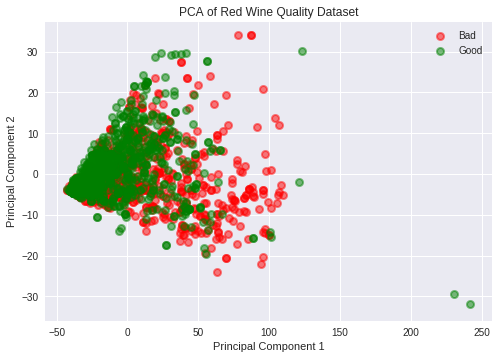

In [8]:
show_scatterplot(X_r, Y_bin, title='PCA of Red Wine Quality Dataset')

## PCA after Standardization

$$
  Z_X = \frac{X - E[X]}{SD[X]}
$$

In [0]:
X_scaled = preprocessing.scale(X)

In [10]:
X_scaled.mean(axis=0)

array([ 3.55493551e-16,  1.73303106e-16, -8.88733878e-17, -1.24422743e-16,
        3.91042906e-16, -6.22113715e-17,  4.44366939e-17,  2.36403212e-14,
        2.86172309e-15,  6.75437748e-16,  1.06648065e-16])

In [11]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
X_r_scaled = pca.fit_transform(X_scaled)

# Percentage of variance explained for each components
print('Explained Variance Ratio (First 2 Components): ', str(pca.explained_variance_ratio_))

Explained Variance Ratio (First 2 Components):  [0.28173931 0.1750827 ]


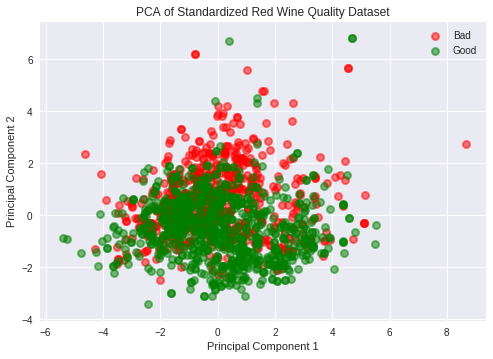

In [13]:
show_scatterplot(X_r_scaled, Y_bin, title='PCA of Standardized Red Wine Quality Dataset')

## PCA after Min-Max Normalization

$$
  X_\text{Min-Max} = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

In [0]:
X_minmax = preprocessing.minmax_scale(X)

In [15]:
X_minmax.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
X_minmax.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
X_r_minmax = pca.fit_transform(X_minmax)

# Percentage of variance explained for each components
print('Explained Variance Ratio (First 2 Components): ', str(pca.explained_variance_ratio_))

Explained Variance Ratio (First 2 Components):  [0.35752287 0.1942533 ]


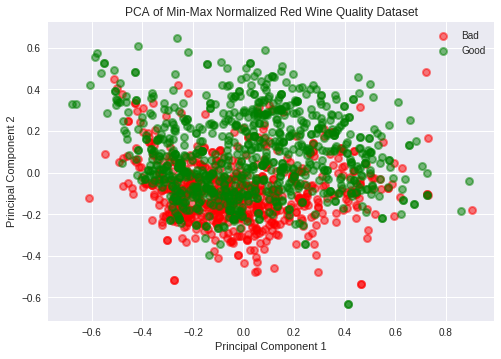

In [18]:
show_scatterplot(X_r_minmax, Y_bin, title='PCA of Min-Max Normalized Red Wine Quality Dataset')

## References & Resources

- [4.3. Preprocessing data — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/modules/preprocessing.html)
- [Comparison of LDA and PCA 2D projection of Iris dataset — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)
- Analysis on the red wine dataset by other data scientists: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/kernels